In [1]:
#%% Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [2]:
#%% Initial Data
url = pd.read_csv(r"C:\Users\natha\Downloads\AAPL (1).csv")
dataset_train = url.iloc[0:1000,:]
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
#%% Data Normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
#%% Incorporating Timesteps into Data
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [5]:
#%% Creating the LSTM Model
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size=32)
print(model)

Epoch 1/100
30/30 [==============================] - 12s 92ms/step - loss: 0.0499
Epoch 2/100
30/30 [==============================] - 3s 91ms/step - loss: 0.0059
Epoch 3/100
30/30 [==============================] - 3s 97ms/step - loss: 0.0048
Epoch 4/100
30/30 [==============================] - 3s 98ms/step - loss: 0.0046
Epoch 5/100
30/30 [==============================] - 3s 98ms/step - loss: 0.0045
Epoch 6/100
30/30 [==============================] - 3s 97ms/step - loss: 0.0043
Epoch 7/100
30/30 [==============================] - 3s 98ms/step - loss: 0.0039
Epoch 8/100
30/30 [==============================] - 3s 97ms/step - loss: 0.0042
Epoch 9/100
30/30 [==============================] - 3s 97ms/step - loss: 0.0044
Epoch 10/100
30/30 [==============================] - 3s 96ms/step - loss: 0.0047
Epoch 11/100
30/30 [==============================] - 3s 98ms/step - loss: 0.0034
Epoch 12/100
30/30 [==============================] - 3s 97ms/step - loss: 0.0035
Epoch 13/100
30/30 [====

In [ ]:
#%% Creating the LSTM Model
def Create_LSTM_Model(unit_per_layer=1000, drop_out=0.5, optimizer='Adam', lr=1e-3):
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
if optimizer.upper()=='ADAM':
        opti_func = Adam(lr=lr, amsgrad=True)
    elif optimizer.upper()=='SGD':
        opti_func = SGD(lr=lr)
    elif optimizer.upper()=='RMSPROP':
        opti_func = RMSprop(lr=lr)
model.compile(optimizer=opti_func, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

In [ ]:
#%% Training the Model
model = Create_LSTM_Model(unit_per_layer=1000, drop_out=0.5, optimizer = 'Adam', lr=5e-4)
t1 = dt.datetime.now()
X_train, X_test, y_train, y_test = train_test_split(LSTM_X_data, LSTM_Y_data, test_size=0.1, random_state=42)
history = model.fit(X_train, y_train, epochs=30, batch_size=512, validation_data=(X_test, y_test))
t2 = dt.datetime.now()
print('Training time: ', t2-t1)  


In [28]:
#%% Making Predictions on Test Set
dataset_test = url.iloc[1001:1259,:]
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 317):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

9/9 [==============================] - 0s 28ms/step


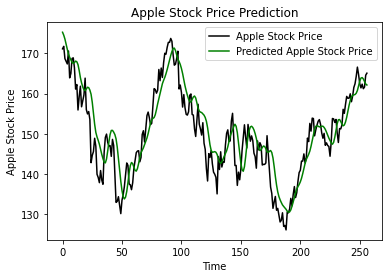

In [29]:
#%% Plotting the Results
plt.plot(real_stock_price, color = 'black', label = 'Apple Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [10]:
26#%% Calculating mse
from sklearn.metrics import mean_squared_error 

mse = mean_squared_error(real_stock_price, predicted_stock_price)
print('Mean Squared Error:', mse)

#%% Calculate rmse
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)


Mean Squared Error: 26.767463362150295
Root Mean Squared Error: 5.173728187888333
